In [ ]:
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme="onedork", context="notebook", ticks=True, grid=True)

import numpy as np
import itertools
import h5py
import os
import sys
import glob

import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import pandas as pd
import tikzplotlib

# from tqdm import tqdm
from tqdm.notebook import tqdm_notebook as tqdm

import helper.circular

In [ ]:
# hist_bin = lambda n: np.linspace(0, np.pi, n + 1, endpoint=True)

df = pd.read_pickle(os.path.join("output/vs_0/voxel_size_simulation.pkl"))

for model in df.model.unique():

    fig, axs = plt.subplots(len(df.f0_inc.unique()),
                            len(df.voxel_size.unique()),
                            subplot_kw={'projection': 'polar'},
                            figsize=(20, 20))
    axs = np.atleast_2d(axs)

    for i, f0_inc in enumerate(sorted(df.f0_inc.unique())):
        for j, vs in enumerate(sorted(df.voxel_size.unique())):
            axs[i, j].set_xticklabels([])
            axs[i, j].set_yticklabels([])
            axs[i, j].set_title(f"f0:{f0_inc:.0f}, vs:{vs}")

    for i, f0_inc in enumerate(sorted(df.f0_inc.unique())):
        for j, vs in enumerate(sorted(df.voxel_size.unique())):

            sub = (df.omega == 0.0) & (df.psi == 1.0) & (df.f1_rot == 0.0) & (
                df.voxel_size == vs) & (df.f0_inc == f0_inc) & (df.model
                                                                == model)

            df_sub = df[sub]

            if len(df_sub) > 1:
                print("fooo", omega, psi)
            if len(df_sub) == 0:
                continue

            phi = df_sub.explode("f_phi").f_phi.to_numpy(float)
            theta = df_sub.explode("f_theta").f_theta.to_numpy(float)
            phi, phi_inc = helper.circular.orientation_sph_plot(phi, theta)

            h, x = np.histogram(phi,
                                np.linspace(-np.pi / 2,
                                            np.pi / 2,
                                            4 * 18 + 1,
                                            endpoint=True),
                                density=True)
            x = x[:-1] + (x[1] - x[0]) / 2
            h = h / np.amax(h)
            axs[i, j].plot(x, h)

            h, x = np.histogram(phi_inc,
                                np.linspace(np.pi / 2,
                                            3 * np.pi / 2,
                                            4 * 18 + 1,
                                            endpoint=True),
                                density=True)
            x = x[:-1] + (x[1] - x[0]) / 2
            h = h / np.amax(h)
            axs[i, j].plot(x, h)

            phi = df_sub.explode("epa_dir").epa_dir.to_numpy(float)
            phi[phi > np.pi] -= 2 * np.pi
            phi[phi > np.pi / 2] -= np.pi
            h, x = np.histogram(phi,
                                np.linspace(-np.pi / 2,
                                            np.pi / 2,
                                            4 * 18 + 1,
                                            endpoint=True),
                                density=True)
            x = x[:-1] + (x[1] - x[0]) / 2
            h = h / np.amax(h)
            axs[i, j].plot(x, h, '--')
            axs[i,
                j].plot([np.deg2rad(180 - f0_inc),
                         np.deg2rad(180 - f0_inc)], [0, 1], '--')

In [ ]:
hist_bin = lambda n: np.linspace(0, np.pi, n + 1, endpoint=True)

df = pd.read_pickle(
    os.path.join("output/repeat_test_1/voxel_size_simulation.pkl"))
# df = df[df.voxel_size >= 0.1]

for model in tqdm(df.model.unique(), leave=True):

    fig, axs = plt.subplots(
        len(df.f0_inc.unique()),
        len(df.voxel_size.unique()),
        # subplot_kw={'projection': 'polar'},
        figsize=(20, 20))
    axs = np.atleast_2d(axs)
    x = np.linspace(0, 180, df.iloc[0]['optic'].shape[-1], False)

    for i, f0_inc in enumerate(sorted(df.f0_inc.unique())):
        for j, vs in enumerate(sorted(df.voxel_size.unique())):
            axs[i, j].set_ylim((9000, 16000))
            axs[i, j].set_title(f"f0:{f0_inc:.0f}, vs:{vs}")

    for i, f0_inc in enumerate(tqdm(sorted(df.f0_inc.unique()), leave=False)):
        for j, vs in enumerate(
                tqdm(sorted(df.voxel_size.unique()), leave=False)):
            for n in tqdm(df.n.unique(), leave=False):
                sub = (df.omega == 0.0) & (df.psi == 1.0) & (
                    df.f1_rot == 0.0) & (df.voxel_size == vs) & (
                        df.f0_inc == f0_inc) & (df.model == model) & (df.n
                                                                      == n)
                df_sub = df[sub]
                for m, row in df_sub.iterrows():
                    optic = row['optic']
                    if m == 0:
                        color = 'g'
                    else:
                        color = 'b'
                    if m != 0 and m % 4 != 0:
                        continue

                    axs[i, j].plot(x, optic, color)

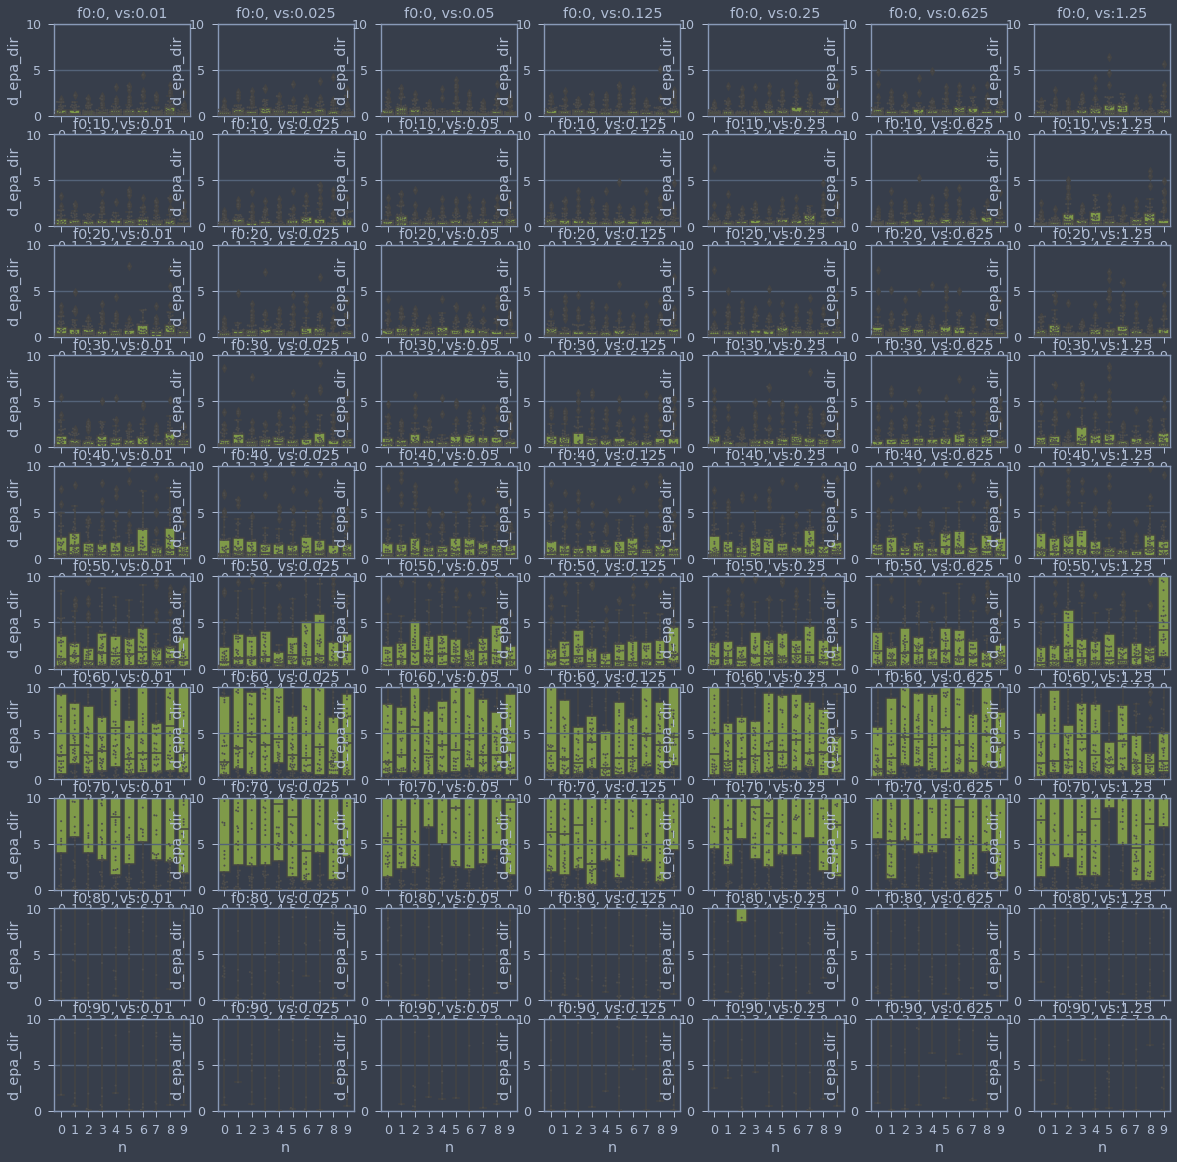

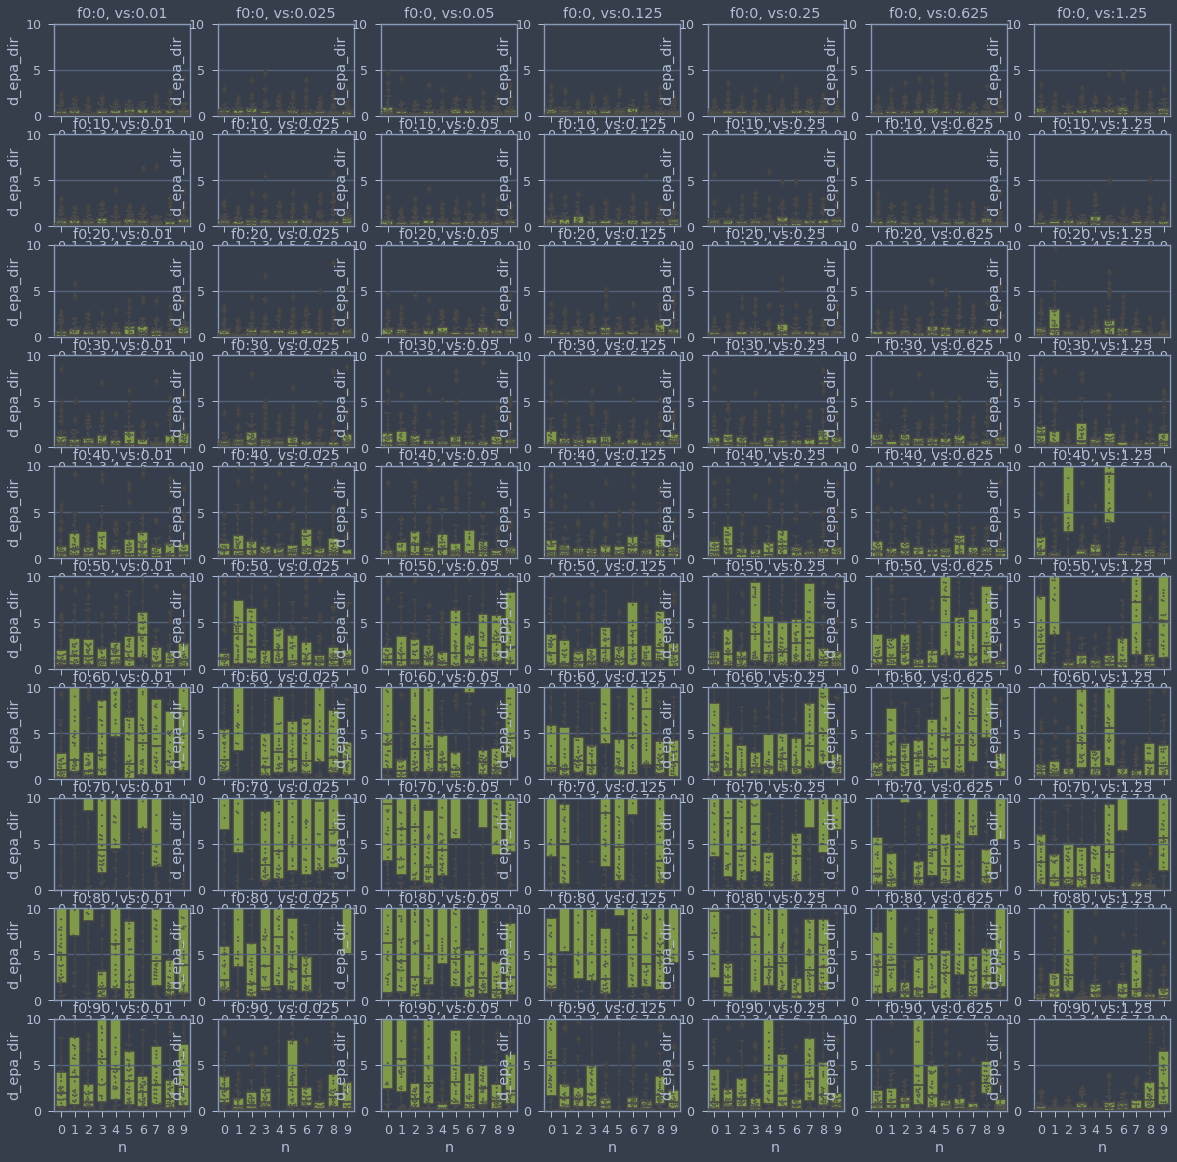

In [37]:
df = pd.read_pickle(
    os.path.join("output/repeat_test_0/voxel_size_simulation.pkl"))

df = df[(df.omega == 0.0) & (df.psi == 1.0) & (df.f1_rot == 0.0)]

# # testing
# df = df[(df.f0_inc == 30) & (df.voxel_size==1.25)]

df = df.explode("epa_trans")
df = df.explode("epa_dir")
df = df.explode("epa_ret")

df = df.assign(epa_dir=df.apply(lambda row: np.rad2deg(
    helper.circular.remap(row.epa_dir, np.pi / 2, -np.pi / 2)),
                                axis=1).values)

for model in df.model.unique():

    fig, axs = plt.subplots(
        len(df.f0_inc.unique()),
        len(df.voxel_size.unique()),
        # subplot_kw={'projection': 'polar'},
        figsize=(20, 20))
    axs = np.atleast_2d(axs)
    # x = np.linspace(0, 180, df.iloc[0]['optic'].shape[-1], False)

    for i, f0_inc in enumerate(sorted(df.f0_inc.unique())):
        for j, vs in enumerate(sorted(df.voxel_size.unique())):
            axs[i, j].set_ylim((0, 10))
            axs[i, j].set_title(f"f0:{f0_inc:.0f}, vs:{vs}")

    for i, f0_inc in enumerate(sorted(df.f0_inc.unique())):
        for j, vs in enumerate(sorted(df.voxel_size.unique())):

            sub = (df.voxel_size == vs) & (df.f0_inc == f0_inc) & (df.model
                                                                   == model)

            df_ = df[sub].copy()
#             df_.assign(d_epa_dir=np.nan)
            
            for n in df_.n.unique():
#                 df_.loc[df_.n == n, "d_epa_dir"] = 0
                df_.loc[df_.n == n, "d_epa_dir"] = (
                    df_.loc[df_.n == n, "epa_dir"] -
                    df_.loc[(df_.n == n) & (df_.m == 0), "epa_dir"].iloc[0])**2

            sns.boxplot(x="n",
                        y="d_epa_dir",
                        data=df_[df_.m > 0],
                        ax=axs[i, j],
                        color="g")
            sns.swarmplot(x="n",
                          y="d_epa_dir",
                          data=df_[df_.m > 0],
                          size=2,
                          color=".3",
                          linewidth=0,
                          ax=axs[i, j])
#             axs[i, j].scatter(df_.n.unique(),
#                               df_[df_.m == 0].epa_dir.to_numpy(),
#                               s=100)